In [3]:
import pandas as pd
import numpy  as np
import seaborn as SB
import matplotlib.pyplot as PLT
import scipy.stats as STATS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import Normalizer

In [5]:
# pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
# pd.set_option('display.width', 500)

In [4]:
DF = pd.read_csv('../../datasets/competitions/house-prices/train.csv')
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
CatCol = [
    'MSSubClass','MSZoning','Street','LotShape','LandContour',
    'LotConfig','LandSlope','Neighborhood','Condition1',
    'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','ExterCond','ExterQual',
    'MasVnrType','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'Heating','HeatingQC','Electrical','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
    'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition',
    'YearRemodAdd','GarageYrBlt','YearBuilt','Exterior2nd','CentralAir','OverallQual','Alley','Utilities','KitchenQual'
]
NumCol = [
    'LotFrontage','LotArea','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
    'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
    'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
    'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
    'MiscVal','ScreenPorch','PoolArea'
]
DropedCols = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']

CatCol = [c for c in CatCol if c not in DropedCols]
NumCol = [c for c in NumCol if c not in DropedCols]

XCols = [*CatCol,*NumCol]
YCol = 'SalePrice'

In [27]:
DF[NumCol].var().round(2)

LotFrontage           589.75
LotArea          99625649.65
OverallCond             1.24
MasVnrArea          32784.97
BsmtFinSF1         208025.47
BsmtFinSF2          26023.91
BsmtUnfSF          195246.41
TotalBsmtSF        192462.36
1stFlrSF           149450.08
2ndFlrSF           190557.08
LowQualFinSF         2364.20
GrLivArea          276129.63
BsmtFullBath            0.27
BsmtHalfBath            0.06
FullBath                0.30
HalfBath                0.25
BedroomAbvGr            0.67
KitchenAbvGr            0.05
TotRmsAbvGrd            2.64
Fireplaces              0.42
GarageCars              0.56
GarageArea          45712.51
WoodDeckSF          15709.81
OpenPorchSF          4389.86
EnclosedPorch        3735.55
3SsnPorch             859.51
MiscVal            246138.06
ScreenPorch          3108.89
PoolArea             1614.22
dtype: float64

In [8]:
DF.drop(DropedCols,axis=1,inplace=True)
DF.drop(DF[~DF['OverallCond'].isin(range(0,11))].index,inplace=True)
DF['LotFrontage'].fillna(STATS.trim_mean(DF['LotFrontage'].dropna(),0.1),inplace=True)
DF['GarageQual'].fillna(DF['GarageQual'].mode()[0],inplace=True) 
DF['Electrical'].fillna(DF['Electrical'].mode()[0],inplace=True)
DF['BsmtFinType2'].fillna(DF['BsmtFinType2'].mode()[0],inplace=True)
DF['BsmtFinType1'].fillna(DF['BsmtFinType1'].mode()[0],inplace=True)
DF['BsmtExposure'].fillna(DF['BsmtExposure'].mode()[0],inplace=True)
DF['MasVnrArea'].fillna(STATS.trim_mean(DF['MasVnrArea'].sort_values(),0.1),inplace=True)
DF['BsmtCond'].fillna(DF['BsmtCond'].mode()[0],inplace=True)
DF['BsmtQual'].fillna(DF['BsmtQual'].mode()[0],inplace=True)
DF['GarageType'].fillna(DF['GarageType'].mode()[0],inplace=True)
DF['GarageYrBlt'].fillna(DF['GarageYrBlt'].mode()[0],inplace=True)
DF['GarageFinish'].fillna(DF['GarageFinish'].mode()[0],inplace=True)
DF['GarageCond'].fillna(DF['GarageCond'].mode()[0],inplace=True)
DF['MasVnrType'].fillna(DF['MasVnrType'].mode()[0],inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def OHC_transformer_single_column(DF,columns):
    
    for column_name in columns:
        label_encoder = LabelEncoder()
        encoded = label_encoder.fit_transform(DF[column_name])
        labels =pd.Series(label_encoder.classes_)

        clmt = ColumnTransformer([(column_name,OneHotEncoder(),[0])], remainder='passthrough')
        clmt_fited_data = clmt.fit_transform(DF[[column_name]]) 
        clmt_fited_data = clmt_fited_data if type(clmt_fited_data)== np.ndarray else clmt_fited_data.toarray()  
        NDF = pd.DataFrame(clmt_fited_data,columns=[f'{column_name}_{x}' for x in labels])
        
        merged = DF.merge(NDF, left_index=True,right_index=True)
        merged = merged.drop(columns=[column_name])
        DF = merged
    return DF

In [10]:
DF = OHC_transformer_single_column(DF,CatCol)

<AxesSubplot:>

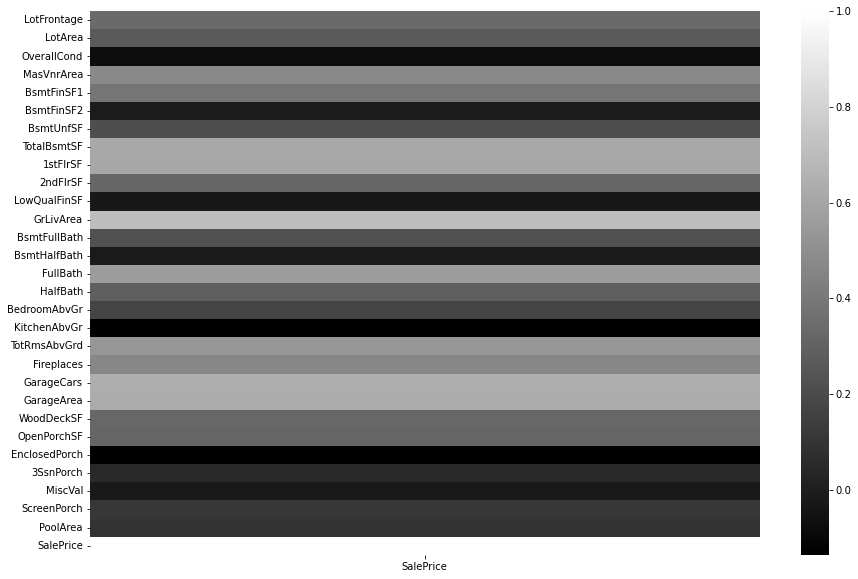

In [11]:
PLT.figure(figsize=(15,10))
SB.heatmap(DF[[*NumCol,'SalePrice']].corr()[['SalePrice']],cmap='gray')

In [12]:
X = DF[DF.columns.difference(['id','SalePrice'])]
Y = DF['SalePrice']
minmaxSCL = MinMaxScaler(feature_range=(0,1))
X  = minmaxSCL.fit_transform(X)

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=3020)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score

In [15]:
random_forest_regressor = RandomForestRegressor(
    random_state=3020,
    min_samples_split=3,
    max_features=300,
    max_leaf_nodes=500,
    n_estimators=500
)
random_forest_regressor.fit(X_train,Y_train)
random_forest_regressor.score(X_test,Y_test)

0.8748393479971157

In [16]:
Y_predicted = random_forest_regressor.predict(X_test)
mean_absolute_error(Y_test,Y_predicted)

16416.26339908616

In [17]:
r2_score(Y_test,Y_predicted)

0.8748393479971157

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
random_forest_gtboost = GradientBoostingRegressor(
    random_state=3020,
    n_estimators=500,
    max_leaf_nodes=10,
    subsample=.9
)
random_forest_gtboost.fit(X_train,Y_train)
random_forest_gtboost.score(X_test,Y_test)

0.9023517529764886

In [37]:
Y_predicted_gtboost = random_forest_gtboost.predict(X_test)
mean_absolute_error(Y_test,Y_predicted_gtboost)

14798.224157467383